In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("youtube_multi_channel_data.csv")

In [4]:
data.head()

,channel_title,video_title,views,likes,comments,published_date
0,3blue1brown,"Summer of Math Exposition #4 | Teachers, I'd l...",111184,5409,372,2025-05-05
1,3blue1brown,Where my explanation of Grover’s algorithm failed,448402,21598,1796,2025-05-04
2,3blue1brown,But what is quantum computing? (Grover's Algo...,1668631,63823,2879,2025-04-30
3,3blue1brown,Testing your intuition for quantum computing,1037565,27312,325,2025-04-30
4,3blue1brown,How to measure nearby galaxies,145032,3667,46,2025-04-20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   channel_title   279 non-null    object
 1   video_title     279 non-null    object
 2   views           279 non-null    int64 
 3   likes           279 non-null    int64 
 4   comments        279 non-null    int64 
 5   published_date  279 non-null    object
dtypes: int64(3), object(3)
memory usage: 13.2+ KB


In [6]:
data.describe()

,views,likes,comments
count,2.790000e+02,2.790000e+02,279.000000
mean,2.405908e+06,7.481059e+04,1731.412186
std,4.839453e+06,1.823085e+05,2583.994976
min,5.360000e+02,3.900000e+01,1.000000
25%,2.034900e+05,7.197000e+03,154.000000
50%,1.205918e+06,4.144000e+04,990.000000
75%,2.841184e+06,8.742900e+04,2283.000000
max,6.324260e+07,2.685969e+06,24724.000000


VIEWS:
Dataset contains a few highly viral videos (63M views), pulling the mean up.
Most videos fall between 200K to 3M views.

LIKES:
Similar to views, likes are skewed by very popular videos
Most videos range from 7K to 87K likes (25th to 75th percentile)

COMMENTS:
Engagement is quite good: many videos have hundreds or thousands of comments

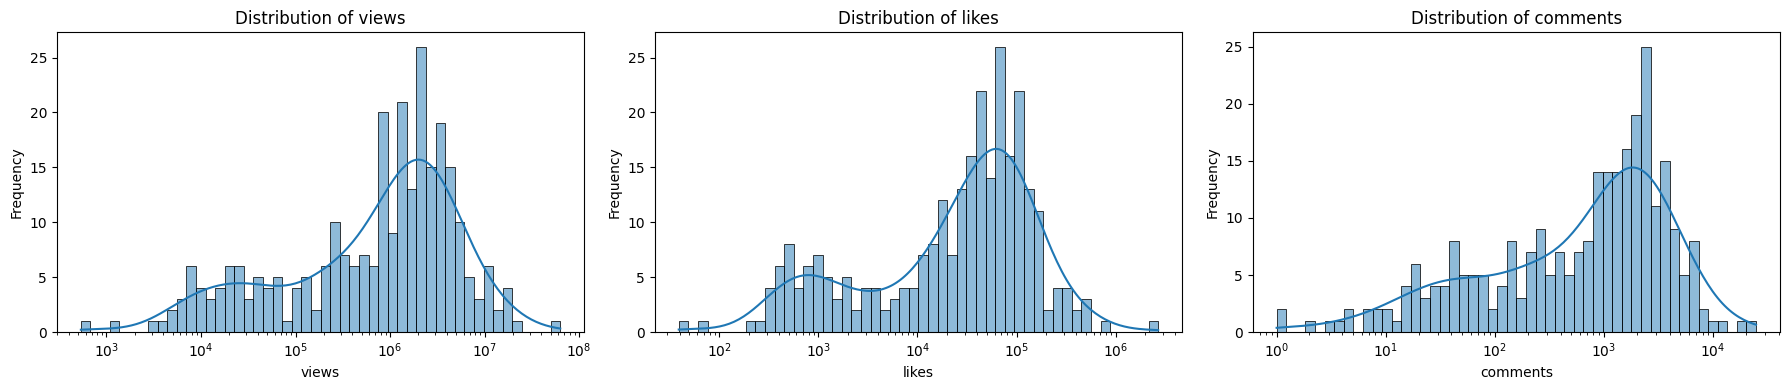

In [11]:
metrics = ['views', 'likes', 'comments']
plt.figure(figsize=(18, 4))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[metric], bins=50, kde=True, log_scale=True)
    plt.title(f"Distribution of {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


VIEWS:

--> The distribution is right-skewed 

--> Most videos get between 10⁵ to 10⁷ views

--> A few videos get very few views 

LIKES:

-->  right-skewed.

--> Most videos get 10K to 100K likes.

COMMENTS:

-->Right-skewed, but more concentrated between 100 to 10K.

-->Many videos get around 1K–3K comments.

Apply Log Transformation for Better Visuals

In [12]:
import numpy as np

data['log_views'] = np.log1p(data['views'])        # log1p = log(1 + x), handles 0s
data['log_likes'] = np.log1p(data['likes'])
data['log_comments'] = np.log1p(data['comments'])

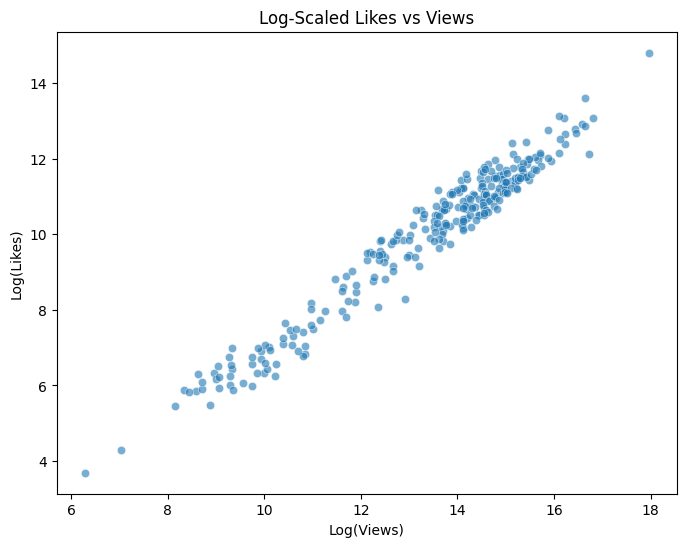

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='log_views', y='log_likes', data=data, alpha=0.6)
plt.title('Log-Scaled Likes vs Views')
plt.xlabel('Log(Views)')
plt.ylabel('Log(Likes)')
plt.show()

Text(0.5, 1.0, 'Like-to-View Ratio Distribution')

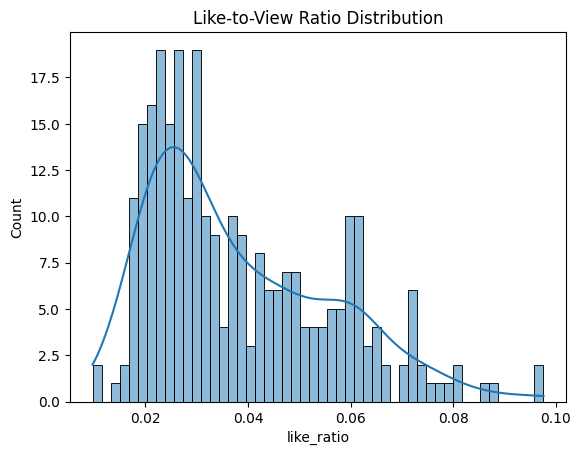

In [16]:
data['like_ratio'] = data['likes'] / data['views']
sns.histplot(data['like_ratio'], bins=50, kde=True)
plt.title('Like-to-View Ratio Distribution')


Text(0.5, 1.0, 'Average Views, Likes, Comments per Channel')

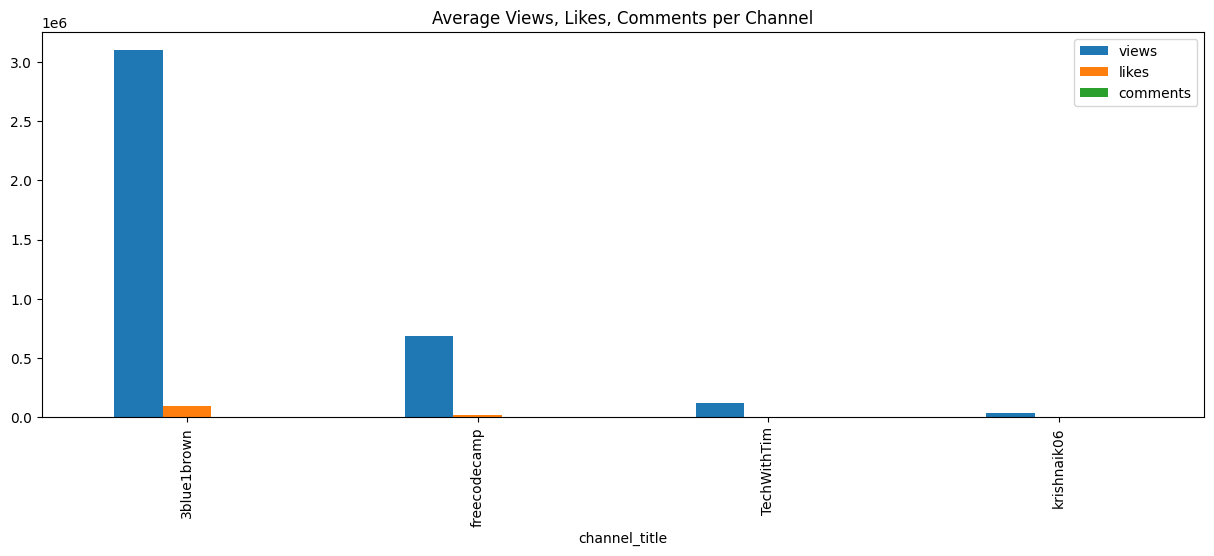

In [17]:
engagement = data.groupby('channel_title')[['views', 'likes', 'comments']].mean().sort_values('views', ascending=False)
engagement[['views', 'likes', 'comments']].plot(kind='bar', figsize=(15,5))
plt.title("Average Views, Likes, Comments per Channel")
